# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [24]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

import logisticClassify2 as lc
import math

## Problem 1

In [25]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2
len(XA)

99

### P1.1

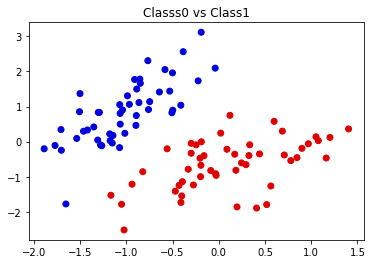

In [26]:
ml.plotClassify2D(None,XA,YA)
plt.title("Classs0 vs Class1")
plt.show()

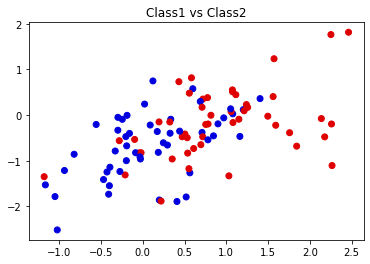

In [27]:
ml.plotClassify2D(None,XB,YB)
plt.title("Class1 vs Class2")
plt.show()

### P1.2

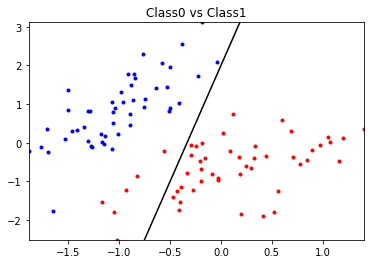

In [28]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b1 = -(self.theta[0]+self.theta[1]*x1b[0])/self.theta[2];# TODO find x2 values as a function of x1's values
    x2b2 = -(self.theta[0]+self.theta[1]*x1b[1])/self.theta[2]
    x2b = np.array([x2b1,x2b2])
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([1,3,-0.5]);  # TODO: insert hard-coded values
learnerA.plotBoundary(XA,YA)
plt.title("Class0 vs Class1")
plt.show()

#how should we find the value?

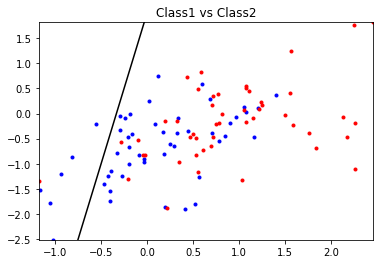

In [29]:
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([0.5,1.5,-0.25]);  # TODO: insert hard-coded values
learnerB.plotBoundary(XB,YB)
plt.title("Class1 vs Class2")
plt.show()

### P 1.3

In [30]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    #raise NotImplementedError
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if r[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    r = [self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1] for i in range(len(X))]
    Yhat = np.array([self.classes[1] if r[i] > 0 else self.classes[0] for i in range(len(r))])
    return Yhat


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([0.5,1.5,-0.25]);  # TODO: insert hard-coded values

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([0.5,1.5,-0.25]);  # TODO: insert hard-coded values
print(f'The training error for dataset A is {learnerA.err(XA,YA)}')
print(f'The training error for dataset B is {learnerB.err(XB,YB)}')



The training error for dataset A is 0.06060606060606061
The training error for dataset B is 0.45454545454545453


If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

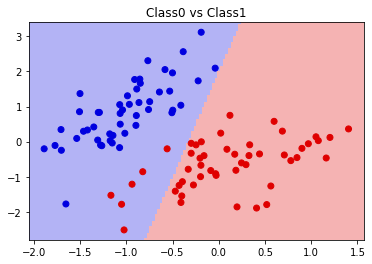

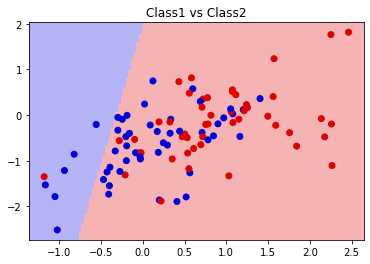

In [31]:
ml.plotClassify2D(learnerA,XA,YA)
plt.title("Class0 vs Class1")
plt.show()

ml.plotClassify2D(learnerB,XB,YB)
plt.title("Class1 vs Class2")
plt.show()

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Given:
$$J_j(\theta) = -y^{(j)}\log\sigma(x^{(j)} \cdot \theta) - (1-y^{(j)})\log(1-\sigma(x^{(j)}\cdot \theta))$$

$$\frac {\alpha J_j(\theta)}{\alpha \theta} = -y^{(j)} \frac{\sigma(x^{(j)} \cdot \theta)(1-\sigma(x^{(j)} \cdot \theta))}{\sigma(x^{(j)} \cdot \theta)} x^{(j)} + (1-y^{(j)}) \frac{\sigma(x^{(j)} \cdot \theta)(1-\sigma(x^{(j)} \cdot \theta))}{1 -\sigma(x^{(j)} \cdot \theta)} x^{(j)} $$

$$\frac {\alpha J_j(\theta)}{\alpha \theta} =  - y^{(j)}x^{(j)} + \sigma(x^{(j)} \cdot \theta)x^{(j)}  $$


Thus, its gradient is:
$$\nabla J_j(\theta) = (\sigma(x^{(j)} \cdot \theta)- y^{(j)})x^{(j)}$$

## 1.6 and 1.7

Now define the train function and complete its missing code.

In [59]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = np.dot(self.theta,XX[i,:]);     # TODO: compute linear response r(x)
            gradi = ((1+math.exp(-ri))**(-1) - YY[i])*XX[i,:];     # TODO: compute gradient of NLL loss
            self.theta -= stepsize*gradi;  # take a gradient ssstep

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        Jsur = []
        for i in range(len(YY)):
            if YY[i] == 1:
                loss = math.log((1+math.exp(-(np.dot(self.theta,XX[i,:]))))**(-1))
            else:
                loss = math.log(1-(1+math.exp(-(np.dot(self.theta,XX[i,:]))))**(-1))
            Jsur.append(loss)
        Jsur = -sum(Jsur)/len(YY)
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke
        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        if epoch > 1:
            if epoch > stopEpochs or abs(Jnll[-2] - Jnll[-1]) < stopTol:
                done = True;   # or if Jnll not changing between epochs ( < stopTol )


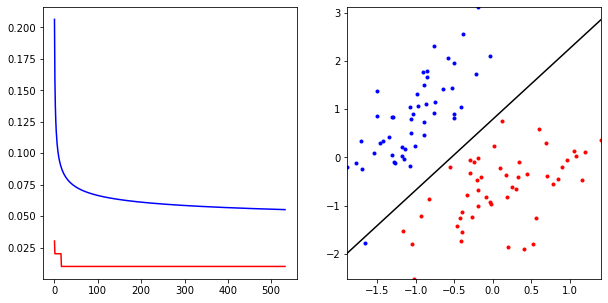

In [60]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier, ):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

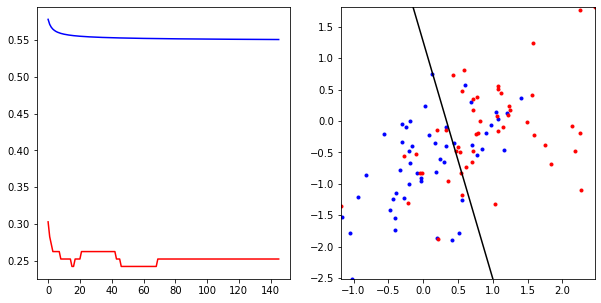

In [61]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier, ):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain


plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerB = logisticClassify2()
learnerB.theta = np.array([0.,1.,0.]);
learnerB.train(XB,YB,initStep=1e-2,stopEpochs=1000,stopTol=1e-5);

### P1.8

In [62]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];theta_list = [];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = np.dot(self.theta,XX[i,:]);     # TODO: compute linear response r(x)
            gradi = ((1+math.exp(-ri))**(-1) - YY[i])*XX[i,:];     # TODO: compute gradient of NLL loss
            self.theta -= stepsize*gradi;  # take a gradient ssstep
            theta_list.append(self.theta)
            
        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        Jsur = []
        for i in range(len(YY)):
            if YY[i] == 1:
                loss = math.log((1+math.exp(-(np.dot(self.theta,XX[i,:]))))**(-1))
            else:
                loss = math.log(1-(1+math.exp(-(np.dot(self.theta,XX[i,:]))))**(-1))
            Jsur.append(loss)
        Jsur = (-sum(Jsur))/len(YY)+2*sum([np.dot(theta_list[i],np.transpose(theta_list[i])) for i in range(len(theta_list))])
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke
        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        if epoch > 1:
            if epoch > stopEpochs or abs(Jnll[-2] - Jnll[-1]) < stopTol:
                done = True;   # or if Jnll not changing between epochs ( < stopTol )


In [63]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [0, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

KeyboardInterrupt: 

In [49]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerB = logisticClassify2()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

KeyboardInterrupt: 

In [ ]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))

plt.show()

# 2

### P 2.1

The VC dimension for T(a+bx1) is 3 since for any three data points, no matter how I label them, a straight line can always go through middle to divide them. Therefore a,b,c can be shattered.

### P 2.2

The VC dimension for T(a*bx1+c/a*x2) is 3 since for any three data points, no matter how I label them, a straight line can always go through middle to divide them. Therefore a,b,c can be shattered.

### P 2.3

The VC dimension for T((x1-a)^2+(x2-b)^2+c) is 3 since, we can achieve shattering for a,b,c by changeing the parameters. But for d, it is impossible.

### P 2.4

The VC dimension for the last one is probability 4, we can shattering a,b,c,d by changing parameters.

# 3

I did all the work by myself.

# 4

My friends and I went to play mini golf together.